# 在此ipyb之前，buffer1的gage-well relationship已经计算完成

# load regulated class

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pair import final_result_cleaned

In [3]:
gage_class=pd.read_excel('data/GAGES-II_ref_non_ref.xlsx')
gage_class.head()

,STAID,CLASS
0,1011000,Non-ref
1,1013500,Ref
2,1015800,Non-ref
3,1016500,Non-ref
4,1017000,Non-ref


In [4]:
gage_in_gslb=pd.read_csv('shp/gsl_nwm_gage.csv')
gage_in_gslb.head()

,id,name,River,latitude,longitude,elevation_m,state
0,10011200,WEST FORK BEAR RIVER AT WHITNEY DAM - NR OAKLE...,WEST FORK BEAR RIVER,40.841614,-110.927119,2797,Utah
1,10011500,BEAR RIVER NEAR UTAH-WYOMING STATE LINE,BEAR RIVER,40.965225,-110.853508,2432,Utah
2,10015700,SULPHUR CR.AB.RES.BL.LA CHAPELLE CR.NR EVANSTO...,SULPHUR CREEK,41.129114,-110.806563,2205,Wyoming
3,10015900,SULPHUR CREEK BL RES. - NEAR EVANSTON - WYO.,SULPHUR CREEK,41.156058,-110.835176,2173,Wyoming
4,10016900,BEAR RIVER AT EVANSTON - WY,BEAR RIVER,41.270224,-110.963793,2057,Wyoming


In [5]:
# Ensure the necessary columns are of string type for merging
gage_class['STAID'] = gage_class['STAID'].astype(str)
gage_in_gslb['id'] = gage_in_gslb['id'].astype(str)

# Merge gage_in_gslb with gage_class to include the class information
gage_in_gslb_with_class = gage_in_gslb.merge(
    gage_class[['STAID', 'CLASS']],
    left_on='id',
    right_on='STAID',
    how='left'
)

# Drop the duplicate STAID column and rename CLASS to lowercase
gage_in_gslb_with_class = gage_in_gslb_with_class.drop('STAID', axis=1)
gage_in_gslb_with_class = gage_in_gslb_with_class.rename(columns={'CLASS': 'class'})

# Calculate the total number of gages
total_gages = len(gage_in_gslb_with_class)

# Count the number of gages in each class
class_counts = gage_in_gslb_with_class['class'].value_counts()

# Calculate the percentage of gages in each class
class_percentages = (class_counts / total_gages) * 100

# Display the results
print("Number of gages in each class:")
print(class_counts)
print("\nPercentage of gages in each class:")
print(class_percentages.round(2), "%")


Number of gages in each class:
class
Non-ref    69
Ref         9
Name: count, dtype: int64

Percentage of gages in each class:
class
Non-ref    88.46
Ref        11.54
Name: count, dtype: float64 %


In [6]:
gage_in_gslb_with_class.head()

,id,name,River,latitude,longitude,elevation_m,state,class
0,10011200,WEST FORK BEAR RIVER AT WHITNEY DAM - NR OAKLE...,WEST FORK BEAR RIVER,40.841614,-110.927119,2797,Utah,Non-ref
1,10011500,BEAR RIVER NEAR UTAH-WYOMING STATE LINE,BEAR RIVER,40.965225,-110.853508,2432,Utah,Non-ref
2,10015700,SULPHUR CR.AB.RES.BL.LA CHAPELLE CR.NR EVANSTO...,SULPHUR CREEK,41.129114,-110.806563,2205,Wyoming,Non-ref
3,10015900,SULPHUR CREEK BL RES. - NEAR EVANSTON - WYO.,SULPHUR CREEK,41.156058,-110.835176,2173,Wyoming,Non-ref
4,10016900,BEAR RIVER AT EVANSTON - WY,BEAR RIVER,41.270224,-110.963793,2057,Wyoming,Non-ref


## load shp

In [6]:
# Import necessary libraries
import geopandas as gpd

# Define file paths
subbasin_shapefile = 'shp/clipped_703_catchments.shp'
basin_shapefile = 'shp/gsl_basin.shp'
stream_shapefile = 'shp/gsl_stream.shp'
well_shapefile = 'shp/well_shp.shp'

# Read the shapefiles using geopandas
subbasin_gdf = gpd.read_file(subbasin_shapefile)
basin_gdf = gpd.read_file(basin_shapefile)
stream_gdf = gpd.read_file(stream_shapefile)
well_gdf = gpd.read_file(well_shapefile)

# Display the first few rows of each GeoDataFrame
print("Subbasin GeoDataFrame:")
print(subbasin_gdf.info())

print("\nBasin GeoDataFrame:")
print(basin_gdf.info())

print("\nStream GeoDataFrame:")
print(stream_gdf.info())

print("\nWell GeoDataFrame:")
print(well_gdf.info())


Subbasin GeoDataFrame:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6157 entries, 0 to 6156
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ogc_fid   6157 non-null   float64 
 1   linkno    6157 non-null   float64 
 2   geometry  6157 non-null   geometry
dtypes: float64(2), geometry(1)
memory usage: 144.4 KB
None

Basin GeoDataFrame:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OBJECTID_1  1 non-null      int64         
 1   OBJECTID_2  1 non-null      int64         
 2   NAME        1 non-null      object        
 3   BASIN       1 non-null      object        
 4   sqmi        1 non-null      float64       
 5   Acres       1 non-null      float64       
 6   AllReports  1 non-null      object        
 7   FullRept99  1 non-null      object  

## plot all the gages in the gslb

In [ ]:
# Create a GeoDataFrame for gage_in_gslb_with_class
geometry = [Point(xy) for xy in zip(gage_in_gslb_with_class['longitude'], gage_in_gslb_with_class['latitude'])]
gage_gdf = gpd.GeoDataFrame(gage_in_gslb_with_class, geometry=geometry)

# Get counts
ref_count = class_counts['Ref']
nonref_count = class_counts['Non-ref']
well_count = len(well_gdf)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Plot layers from bottom to top
subbasin_gdf.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5, zorder=1)
stream_gdf.plot(ax=ax, color='steelblue', linewidth=0.8, zorder=2)
basin_gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5, zorder=3)
well_gdf.plot(ax=ax, color='lightpink', edgecolor='black', marker='o',
              markersize=50, linewidth=0.5, label=f'Wells ({well_count})', alpha=0.7, zorder=4)

# Plot non-reference gages first
gage_gdf[gage_gdf['class'] == 'Non-ref'].plot(ax=ax, marker='^', color='red',
                                              edgecolor='darkred', markersize=150,
                                              label='Non-reference Gage (69)', zorder=5)

# Plot reference gages on top
gage_gdf[gage_gdf['class'] == 'Ref'].plot(ax=ax, marker='^', color='yellow',
                                          edgecolor='orange', markersize=150,
                                          label='Reference Gage (9)', zorder=6)

# Add legend with updated frame
legend = plt.legend(title=f'Total Gages: {total_gages}',
                    frameon=True, facecolor='white', edgecolor='black')

plt.title('Wells and Gages in GSL Basin')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## plot the gages in the buffer1

In [7]:
gage_to_wells_df = pd.read_csv('data/gage_well_mapping_revised.csv')

In [8]:
gage_to_wells_df.head()

,gage_id,well_id,latitude,longitude,name,River,state,Well_Name,lat_dec,long_dec,Aquifer_Na,State
0,10011500,4.055411e+14,40.965225,-110.853508,BEAR RIVER NEAR UTAH-WYOMING STATE LINE,BEAR RIVER,Utah,(A- 2-10) 9bbc- 1,40.928003,-110.827951,GSL Basin,UT
1,10015700,4.103411e+14,41.129114,-110.806563,SULPHUR CR.AB.RES.BL.LA CHAPELLE CR.NR EVANSTO...,SULPHUR CREEK,Wyoming,13-119-34cbb02,41.061336,-110.831286,GSL Basin,WY
2,10015700,4.106111e+14,41.129114,-110.806563,SULPHUR CR.AB.RES.BL.LA CHAPELLE CR.NR EVANSTO...,SULPHUR CREEK,Wyoming,13-119-13cb 01,41.103003,-110.792952,GSL Basin,WY
3,10015700,4.108211e+14,41.129114,-110.806563,SULPHUR CR.AB.RES.BL.LA CHAPELLE CR.NR EVANSTO...,SULPHUR CREEK,Wyoming,13-119-02bb 01,41.139114,-110.812119,GSL Basin,WY
4,10015900,4.103411e+14,41.156058,-110.835176,SULPHUR CREEK BL RES. - NEAR EVANSTON - WYO.,SULPHUR CREEK,Wyoming,13-119-34cbb02,41.061336,-110.831286,GSL Basin,WY


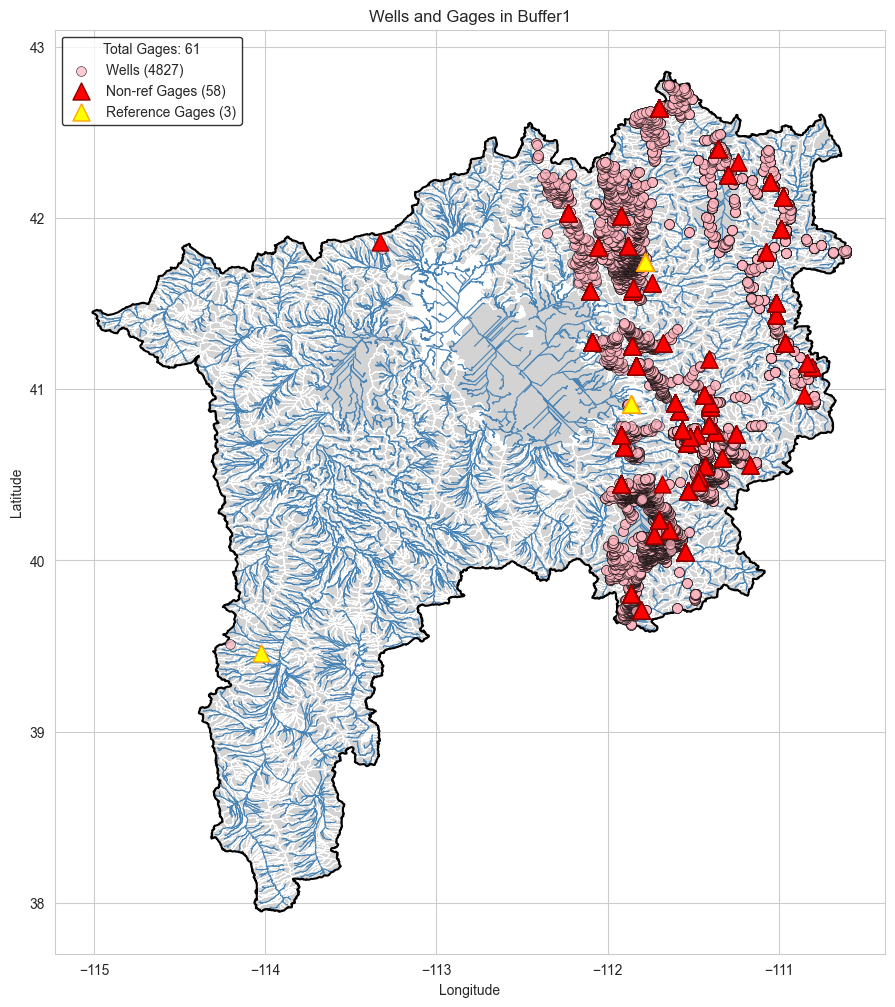

In [20]:
from shapely.geometry import Point
import geopandas as gpd

# Merge gage_to_wells_df with gage class info
gage_to_wells_df['gage_id'] = gage_to_wells_df['gage_id'].astype(str)
gage_class['STAID'] = gage_class['STAID'].astype(str)
gage_wells_with_class = gage_to_wells_df.merge(
    gage_class[['STAID', 'CLASS']],
    left_on='gage_id',
    right_on='STAID',
    how='left'
)

# Create GeoDataFrame for wells
well_geometry = [Point(xy) for xy in zip(gage_to_wells_df['long_dec'], gage_to_wells_df['lat_dec'])]
wells_gdf = gpd.GeoDataFrame(gage_to_wells_df, geometry=well_geometry)

# Create GeoDataFrame for gages  
gage_geometry = [Point(xy) for xy in zip(gage_wells_with_class['longitude'], gage_wells_with_class['latitude'])]
gages_gdf = gpd.GeoDataFrame(gage_wells_with_class, geometry=gage_geometry)

# Get counts
unique_wells_count = wells_gdf['well_id'].nunique()
ref_gage_count = gages_gdf[gages_gdf['CLASS'] == 'Ref']['gage_id'].nunique()
nonref_gage_count = gages_gdf[gages_gdf['CLASS'] == 'Non-ref']['gage_id'].nunique()

# Calculate total unique gages before plotting
total_gages = gages_gdf['gage_id'].nunique()

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Plot layers from bottom to top
subbasin_gdf.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5, zorder=1)
stream_gdf.plot(ax=ax, color='steelblue', linewidth=0.8, zorder=2)
basin_gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5, zorder=3)

# Plot wells between gages and subbasins
wells_gdf.plot(ax=ax, color='lightpink', edgecolor='black', marker='o',
               markersize=50, linewidth=0.5, label=f'Wells ({unique_wells_count})', alpha=0.7, zorder=4)

# Plot non-reference gages first
gages_gdf[gages_gdf['CLASS'] == 'Non-ref'].plot(ax=ax, marker='^', color='red',
                                                edgecolor='darkred', markersize=150,
                                                label=f'Non-ref Gages ({nonref_gage_count})', zorder=5)

# Plot reference gages on top  
gages_gdf[gages_gdf['CLASS'] == 'Ref'].plot(ax=ax, marker='^', color='yellow',
                                            edgecolor='orange', markersize=150,
                                            label=f'Reference Gages ({ref_gage_count})', zorder=6)

# Add legend with total gages in title
legend = plt.legend(title=f'Total Gages: {total_gages}',
                    frameon=True, facecolor='white', edgecolor='black',
                    loc='upper left')

plt.title('Wells and Gages in Buffer1')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## load pchip data

In [ ]:
final_measurements_delta = pd.read_csv('data/pchip_interpolated_data_with_delta.csv')

gage_to_wells_df = pd.read_csv('data/gage_well_mapping_revised.csv')


In [ ]:
final_measurements_delta.head()

# 把buffer1应用于时间序列

## 简化数据

In [ ]:
well_reach_relationships.head()

In [ ]:
# Load the data
reach_centroids_with_Elev = pd.read_csv('data/reach_centroids_with_Elev.csv')
well_reach_relationships = pd.read_csv('data/wells_with_distances.csv')

# Convert all column names to lowercase for reach_centroids_with_Elev
reach_centroids_with_Elev.columns = reach_centroids_with_Elev.columns.str.lower()
reach_centroids_with_Elev.rename(columns={'latitude': 'reach_lat', 'longitude': 'reach_lon', 'avg_gse': 'reach_elev_m'},
                                 inplace=True)

# Drop unnecessary columns from reach_centroids_with_Elev
reach_centroids_with_Elev.drop(columns=['nasa_gse', 'aw3d_gse'], inplace=True)

# Convert all column names to lowercase for well_reach_relationships
well_reach_relationships.columns = well_reach_relationships.columns.str.lower()

# Rename specific columns in well_reach_relationships
well_reach_relationships.rename(columns={
    'lat_dec': 'well_lat',
    'long_dec': 'well_lon',
    'gse': 'well_elev'
}, inplace=True)

# Drop unnecessary columns from well_reach_relationships
columns_to_drop = ['well_name', 'aquiferid', 'aquifer_name', 'geometry', 'stream_point_x', 'stream_point_y','state']
well_reach_relationships.drop(columns=columns_to_drop, inplace=True)

# Merge the two DataFrames on 'nearest_reach_id' and 'reach_id'
merged_df = pd.merge(
    well_reach_relationships,
    reach_centroids_with_Elev,
    left_on='nearest_reach_id',
    right_on='reach_id',
    how='inner'
)

# Drop the redundant 'nearest_reach_id' column if needed
merged_df.drop(columns=['nearest_reach_id'], inplace=True)

# Display the merged DataFrame
merged_df.head()


In [ ]:
merged_df.to_csv('data/well_reach.csv', index=False)

In [ ]:
merged_df.head()

## 从measurement 里面用buffer1筛选。只用做一次

In [ ]:
final_measurements_delta

In [ ]:
final_measurements_delta.info()

In [ ]:
import pandas as pd

# Assuming final_measurements_delta is already loaded
# Drop the 'aquiferid' and 'state' columns if they exist
final_measurements_delta.drop(columns=['aquiferid', 'state'], inplace=True, errors='ignore')

# Sort by 'well_id' and 'date'
final_measurements_delta.sort_values(by=['Well_ID', 'Date'], inplace=True)

# Select only the specified columns and convert column names to lowercase
final_measurements_delta = final_measurements_delta[['Well_ID', 'Date', 'WTE', 'Delta_WTE']]
final_measurements_delta.columns = final_measurements_delta.columns.str.lower()

# Display the updated DataFrame
print(final_measurements_delta.head())


In [ ]:
final_measurements_delta.to_csv('data/final_measurements_delta_remove_nan.csv', index=False)

In [ ]:
gage_to_wells_df

In [ ]:
gage_to_wells_df.info()

In [ ]:
import pandas as pd

# Assuming gage_to_wells_df is already loaded
# Convert all column names to lowercase
gage_to_wells_df.columns = gage_to_wells_df.columns.str.lower()

# Drop the specified columns
gage_to_wells_df.drop(columns=['name', 'river', 'state', 'aquifer_na'], inplace=True, errors='ignore')

# Rename the specified columns
gage_to_wells_df.rename(columns={
    'latitude': 'gage_lat',
    'longitude': 'gage_lon',
    'lat_dec': 'well_lat',
    'long_dec': 'well_lon'
}, inplace=True)

# Display the updated DataFrame
print(gage_to_wells_df.head())


## 用buffer1筛选时间

In [21]:
import pandas as pd

# Assuming gage_to_wells_df and final_measurements_delta are already loaded

# Perform an inner merge to filter and combine the data based on 'well_id'
filtered_data = pd.merge(
    final_measurements_delta,
    gage_to_wells_df[['gage_id', 'well_id', 'gage_lat', 'gage_lon', 'well_lat', 'well_lon']],
    on='well_id',
    how='inner'
)

# Display the new DataFrame
print(filtered_data.head())


NameError: name 'final_measurements_delta' is not defined

In [ ]:
filtered_data.to_csv('data/after_buffer1.csv', index=False)

In [ ]:
filtered_data = pd.read_csv('data/after_buffer1.csv')

In [ ]:
filtered_data.head()

In [ ]:
# Calculate the number of unique wells
unique_wells_count = filtered_data['well_id'].nunique()

# Display the result
print(f"Number of unique wells: {unique_wells_count}")

unique_gages_count = filtered_data['gage_id'].nunique()
print(f"Number of unique gages: {unique_gages_count}")

# buffer2

## 看全部

In [ ]:
import pandas as pd
import numpy as np

def filter_and_analyze_wte(filtered_data, merged_df, distance_buffer_meters=5, delta_bins=None):
    # Convert WTE from feet to meters
    filtered_data['wte_meters'] = filtered_data['wte'] * 0.3048

    # Merge filtered_data with merged_df to get reach_elev
    merged_data = pd.merge(
        filtered_data,
        merged_df[['well_id', 'reach_elev_m']],
        on='well_id',
        how='inner'
    )

    # Calculate the difference between reach elevation and WTE
    merged_data['delta_elev'] = merged_data['reach_elev_m'] - merged_data['wte_meters']

    # Filter out values where the difference is greater than the distance buffer
    filtered_result = merged_data[merged_data['delta_elev'] <= distance_buffer_meters]

    # Define default delta bins if not provided
    if delta_bins is None:
        delta_bins = [-float('inf'), -20, -10, -5, 0, 5, 10, 20, 30, 50, 75, 100, float('inf')]

    # Bin the delta_elev values
    bin_labels = [f"< {delta_bins[1]}"] + \
                 [f"{delta_bins[i]} to {delta_bins[i+1]}" for i in range(1, len(delta_bins)-2)] + \
                 [f">= {delta_bins[-2]}"]
    filtered_result['delta_bin'] = pd.cut(filtered_result['delta_elev'], bins=delta_bins, labels=bin_labels)

    # Calculate statistics
    total_measurements = len(filtered_result)
    dist_stats = filtered_result.groupby('delta_bin').size().reset_index(name='count')
    dist_stats['percentage'] = (dist_stats['count'] / total_measurements * 100).round(2)

    # Display statistics
    print(dist_stats)

    return filtered_result, dist_stats

# Example usage
filtered_data = pd.read_csv('data/after_buffer1.csv')  # Load your filtered data
merged_df = pd.read_csv('data/well_reach.csv')  # Load the merged data with reach_elev
filtered_result, dist_stats = filter_and_analyze_wte(filtered_data, merged_df, distance_buffer_meters=10000)


In [ ]:
dist_stats

## 正式运算

In [ ]:
import pandas as pd
import numpy as np

def filter_and_analyze_wte(filtered_data, merged_df, distance_buffer_meters=5, delta_bins=None):
    # Convert WTE from feet to meters
    filtered_data['wte_meters'] = filtered_data['wte'] * 0.3048

    # Merge filtered_data with merged_df to get reach_elev
    merged_data = pd.merge(
        filtered_data,
        merged_df[['well_id', 'reach_elev_m']],
        on='well_id',
        how='inner'
    )

    # Calculate the difference between reach elevation and WTE
    merged_data['delta_elev'] = merged_data['reach_elev_m'] - merged_data['wte_meters']

    # Filter out values where the difference is greater than the distance buffer
    filtered_result = merged_data[merged_data['delta_elev'] <= distance_buffer_meters]

    # Define default delta bins if not provided
    if delta_bins is None:
        delta_bins = [-float('inf'), -20, -10, -5, 0, 5, 10, 20, 30, 50, 75, 100, float('inf')]

    # Bin the delta_elev values
    bin_labels = [f"< {delta_bins[1]}"] + \
                 [f"{delta_bins[i]} to {delta_bins[i+1]}" for i in range(1, len(delta_bins)-2)] + \
                 [f">= {delta_bins[-2]}"]
    filtered_result['delta_bin'] = pd.cut(filtered_result['delta_elev'], bins=delta_bins, labels=bin_labels)

    # Calculate statistics
    total_measurements = len(filtered_result)
    dist_stats = filtered_result.groupby('delta_bin').size().reset_index(name='count')
    dist_stats['percentage'] = (dist_stats['count'] / total_measurements * 100).round(2)

    # Display statistics
    print(dist_stats)

    return filtered_result, dist_stats

# Example usage
filtered_data = pd.read_csv('data/after_buffer1.csv')  # Load your filtered data
merged_df = pd.read_csv('data/well_reach.csv')  # Load the merged data with reach_elev
filtered_result, dist_stats = filter_and_analyze_wte(filtered_data, merged_df, distance_buffer_meters=30)


In [ ]:
filtered_result.to_csv('data/after_buffer2_30m.csv', index=False)

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np

def filter_and_analyze_wte(filtered_data, merged_df, distance_buffer_meters=5, delta_bins=None):
    # Convert WTE from feet to meters
    filtered_data['wte_meters'] = filtered_data['wte'] * 0.3048

    # Merge filtered_data with merged_df to get reach_elev
    merged_data = pd.merge(
        filtered_data,
        merged_df[['well_id', 'reach_elev_m']],
        on='well_id',
        how='inner'
    )

    # Calculate the difference between reach elevation and WTE
    merged_data['delta_elev'] = merged_data['reach_elev_m'] - merged_data['wte_meters']

    # Filter out values where the difference is greater than the distance buffer
    filtered_result = merged_data[merged_data['delta_elev'] <= distance_buffer_meters]

    # Define default delta bins if not provided
    if delta_bins is None:
        delta_bins = [-float('inf'), -20, -10, -5, 0, 5, 10, 20, 30, 50, 75, 100, float('inf')]

    # Bin the delta_elev values
    bin_labels = [f"< {delta_bins[1]}"] + \
                 [f"{delta_bins[i]} to {delta_bins[i+1]}" for i in range(1, len(delta_bins)-2)] + \
                 [f">= {delta_bins[-2]}"]
    filtered_result['delta_bin'] = pd.cut(filtered_result['delta_elev'], bins=delta_bins, labels=bin_labels)

    # Calculate statistics
    total_measurements = len(filtered_result)
    dist_stats = filtered_result.groupby('delta_bin').size().reset_index(name='count')
    dist_stats['percentage'] = (dist_stats['count'] / total_measurements * 100).round(2)

    # Display statistics
    print(dist_stats)

    return filtered_result, dist_stats

# Example usage
filtered_data = pd.read_csv('data/after_buffer1.csv')  # Load your filtered data
merged_df = pd.read_csv('data/well_reach.csv')  # Load the merged data with reach_elev
filtered_result_10, dist_stats = filter_and_analyze_wte(filtered_data, merged_df, distance_buffer_meters=10)


In [ ]:
filtered_result_10.to_csv('data/after_buffer2_10m.csv', index=False)

### plot all the gages after buffer 2

In [10]:
filtered_result_10 = pd.read_csv('data/after_buffer2_10m.csv')

In [11]:
# Assuming filtered_result_10 is already defined
unique_wells_count = filtered_result_10['well_id'].nunique()
unique_gages_count = filtered_result_10['gage_id'].nunique()

print(f"Number of unique wells: {unique_wells_count}")
print(f"Number of unique gages: {unique_gages_count}")


Number of unique wells: 2642
Number of unique gages: 54


In [12]:
# Count unique gages by class in filtered_result_10
class_counts = filtered_result_10['gage_id'].nunique()
print(f"Total unique gages: {class_counts}")

# Merge with gage_class to get the class information
gage_class['STAID'] = gage_class['STAID'].astype(str)
filtered_result_10['gage_id'] = filtered_result_10['gage_id'].astype(str)

gages_with_class = filtered_result_10[['gage_id']].drop_duplicates().merge(
    gage_class[['STAID', 'CLASS']],
    left_on='gage_id',
    right_on='STAID',
    how='left'
)

class_distribution = gages_with_class['CLASS'].value_counts()
print("\nNumber of gages by class:")
print(class_distribution)


Total unique gages: 54

Number of gages by class:
CLASS
Non-ref    53
Ref         1
Name: count, dtype: int64


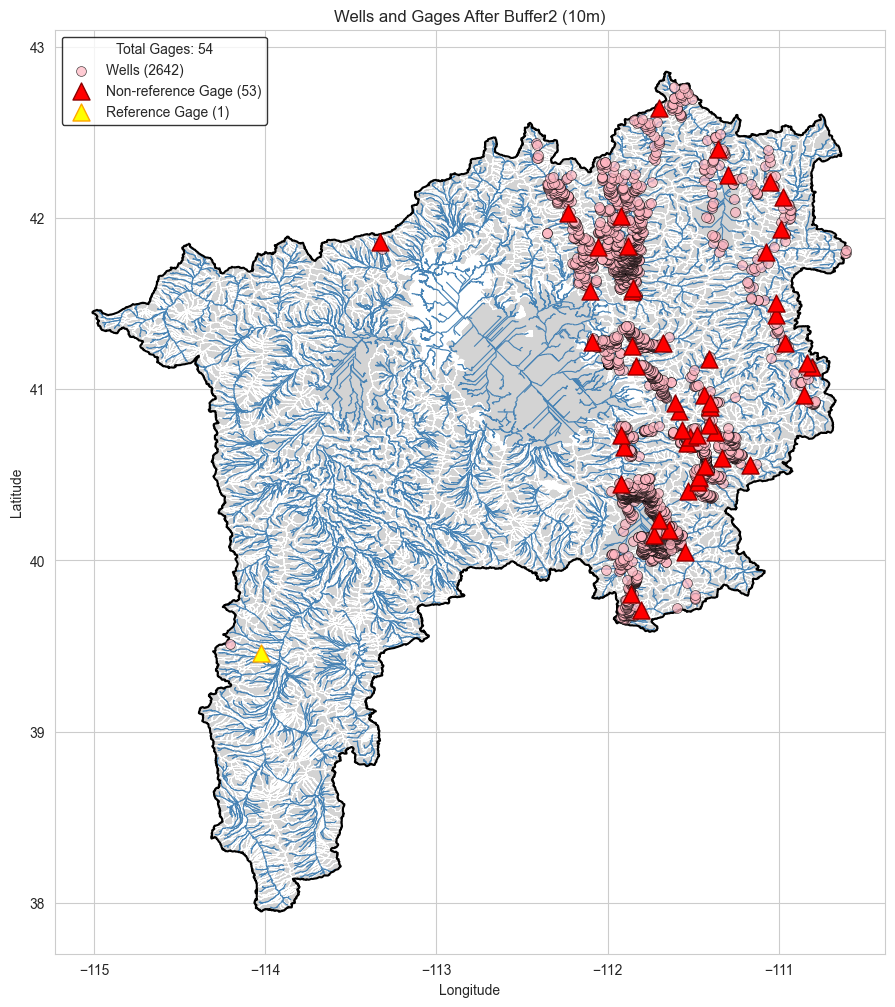

In [13]:
from shapely.geometry import Point
import geopandas as gpd

# Load necessary data
filtered_result_10 = pd.read_csv('data/after_buffer2_10m.csv')
gage_class = pd.read_excel('data/GAGES-II_ref_non_ref.xlsx')
subbasin_gdf = gpd.read_file('shp/clipped_703_catchments.shp')
basin_gdf = gpd.read_file('shp/gsl_basin.shp')
stream_gdf = gpd.read_file('shp/gsl_stream.shp')

# Get unique well locations
unique_well_locations = filtered_result_10[['well_id', 'well_lon', 'well_lat']].drop_duplicates()

# Get unique gage locations with class information
unique_gage_locations = filtered_result_10[['gage_id', 'gage_lon', 'gage_lat']].drop_duplicates()
gage_class['STAID'] = gage_class['STAID'].astype(str)
unique_gage_locations['gage_id'] = unique_gage_locations['gage_id'].astype(str)
unique_gage_locations = pd.merge(
    unique_gage_locations,
    gage_class[['STAID', 'CLASS']],
    left_on='gage_id',
    right_on='STAID',
    how='left'
)

# Create GeoDataFrames
well_gdf = gpd.GeoDataFrame(
    unique_well_locations,
    geometry=[Point(xy) for xy in zip(unique_well_locations['well_lon'], unique_well_locations['well_lat'])]
)

gage_gdf = gpd.GeoDataFrame(
    unique_gage_locations,
    geometry=[Point(xy) for xy in zip(unique_gage_locations['gage_lon'], unique_gage_locations['gage_lat'])]
)

# Get counts
well_count = len(well_gdf)
ref_count = len(gage_gdf[gage_gdf['CLASS'] == 'Ref'])
nonref_count = len(gage_gdf[gage_gdf['CLASS'] == 'Non-ref'])
total_gages = ref_count + nonref_count

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Plot layers from bottom to top
subbasin_gdf.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5, zorder=1)
stream_gdf.plot(ax=ax, color='steelblue', linewidth=0.8, zorder=2)
basin_gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5, zorder=3)
well_gdf.plot(ax=ax, color='lightpink', edgecolor='black', marker='o',
              markersize=50, linewidth=0.5, label=f'Wells ({well_count})', alpha=0.7, zorder=4)

# Plot non-reference gages first
gage_gdf[gage_gdf['CLASS'] == 'Non-ref'].plot(ax=ax, marker='^', color='red',
                                              edgecolor='darkred', markersize=150,
                                              label=f'Non-reference Gage ({nonref_count})', zorder=5)

# Plot reference gages on top
gage_gdf[gage_gdf['CLASS'] == 'Ref'].plot(ax=ax, marker='^', color='yellow',
                                          edgecolor='orange', markersize=150,
                                          label=f'Reference Gage ({ref_count})', zorder=6)

# Add legend with updated frame
legend = plt.legend(title=f'Total Gages: {total_gages}',
                    frameon=True, facecolor='white', edgecolor='black')

plt.title('Wells and Gages After Buffer2 (10m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [17]:
filtered_result_30 = pd.read_csv('data/after_buffer2_30m.csv')

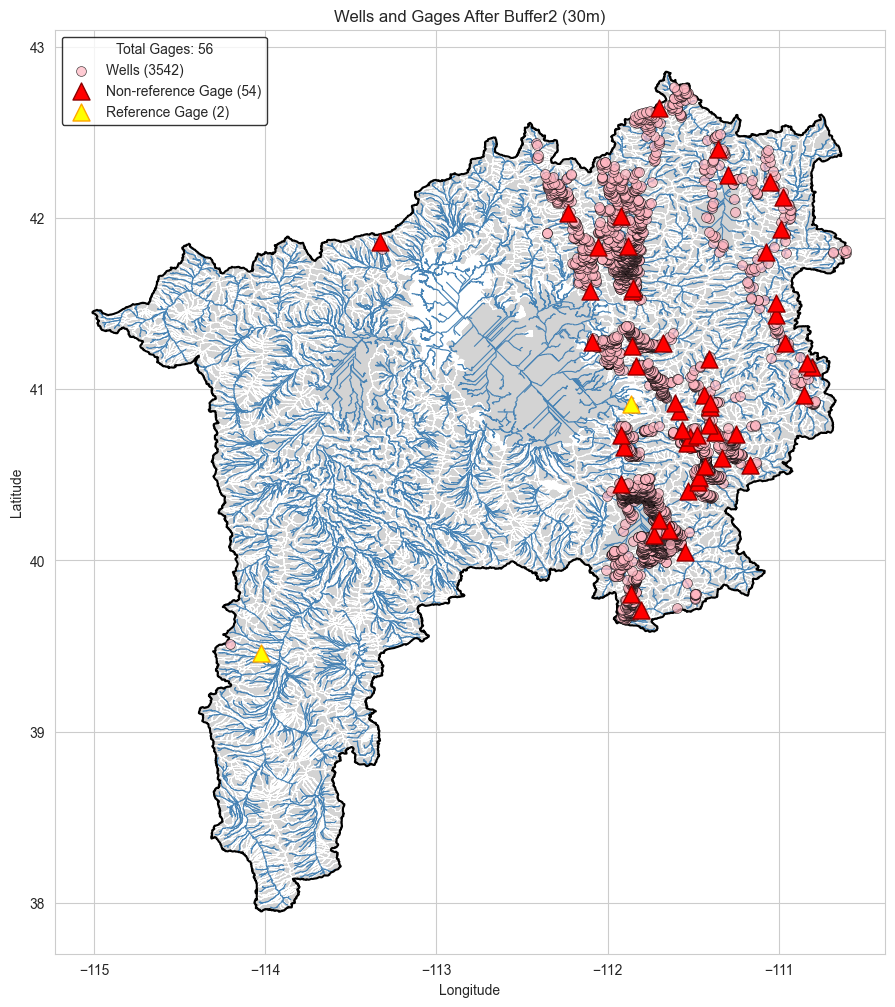

In [18]:
from shapely.geometry import Point
import geopandas as gpd

# Load necessary data
gage_class = pd.read_excel('data/GAGES-II_ref_non_ref.xlsx')
subbasin_gdf = gpd.read_file('shp/clipped_703_catchments.shp')
basin_gdf = gpd.read_file('shp/gsl_basin.shp')
stream_gdf = gpd.read_file('shp/gsl_stream.shp')

# Get unique well locations
unique_well_locations = filtered_result_30[['well_id', 'well_lon', 'well_lat']].drop_duplicates()

# Get unique gage locations with class information
unique_gage_locations = filtered_result_30[['gage_id', 'gage_lon', 'gage_lat']].drop_duplicates()
gage_class['STAID'] = gage_class['STAID'].astype(str)
unique_gage_locations['gage_id'] = unique_gage_locations['gage_id'].astype(str)
unique_gage_locations = pd.merge(
    unique_gage_locations,
    gage_class[['STAID', 'CLASS']],
    left_on='gage_id',
    right_on='STAID',
    how='left'
)

# Create GeoDataFrames
well_gdf = gpd.GeoDataFrame(
    unique_well_locations,
    geometry=[Point(xy) for xy in zip(unique_well_locations['well_lon'], unique_well_locations['well_lat'])]
)

gage_gdf = gpd.GeoDataFrame(
    unique_gage_locations,
    geometry=[Point(xy) for xy in zip(unique_gage_locations['gage_lon'], unique_gage_locations['gage_lat'])]
)

# Get counts
well_count = len(well_gdf)
ref_count = len(gage_gdf[gage_gdf['CLASS'] == 'Ref'])
nonref_count = len(gage_gdf[gage_gdf['CLASS'] == 'Non-ref'])
total_gages = ref_count + nonref_count

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Plot layers from bottom to top
subbasin_gdf.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5, zorder=1)
stream_gdf.plot(ax=ax, color='steelblue', linewidth=0.8, zorder=2)
basin_gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5, zorder=3)
well_gdf.plot(ax=ax, color='lightpink', edgecolor='black', marker='o',
              markersize=50, linewidth=0.5, label=f'Wells ({well_count})', alpha=0.7, zorder=4)

# Plot non-reference gages first
gage_gdf[gage_gdf['CLASS'] == 'Non-ref'].plot(ax=ax, marker='^', color='red',
                                              edgecolor='darkred', markersize=150,
                                              label=f'Non-reference Gage ({nonref_count})', zorder=5)

# Plot reference gages on top
gage_gdf[gage_gdf['CLASS'] == 'Ref'].plot(ax=ax, marker='^', color='yellow',
                                          edgecolor='orange', markersize=150,
                                          label=f'Reference Gage ({ref_count})', zorder=6)

# Add legend with updated frame
legend = plt.legend(title=f'Total Gages: {total_gages}',
                    frameon=True, facecolor='white', edgecolor='black')

plt.title('Wells and Gages After Buffer2 (30m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# spatial analysis

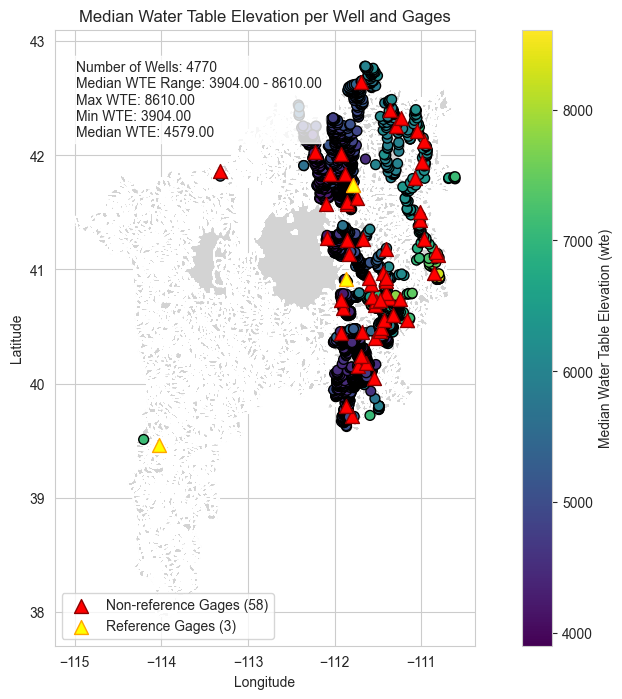

In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load the after_buffer1 data
after_buffer1 = pd.read_csv('data/after_buffer1.csv')

# Calculate the median wte for each well
median_wte_per_well = after_buffer1.groupby('well_id')['wte'].median().reset_index()

# Merge the median_wte_per_well with unique well locations
unique_well_locations = after_buffer1[['well_id', 'well_lon', 'well_lat']].drop_duplicates()
median_wte_per_well = median_wte_per_well.merge(unique_well_locations, on='well_id')

# Extract unique gage locations
unique_gage_locations = after_buffer1[['gage_id', 'gage_lon', 'gage_lat']].drop_duplicates()

# Load gage class information
gage_class = pd.read_excel('data/GAGES-II_ref_non_ref.xlsx')
gage_class['STAID'] = gage_class['STAID'].astype(str)
unique_gage_locations['gage_id'] = unique_gage_locations['gage_id'].astype(str)

# Merge gage locations with class information
unique_gage_locations = pd.merge(
    unique_gage_locations,
    gage_class[['STAID', 'CLASS']],
    left_on='gage_id',
    right_on='STAID',
    how='left'
)

# Load the subbasin shapefile
subbasin_gdf = gpd.read_file('shp/clipped_703_catchments.shp').to_crs("EPSG:4326")

# Create a GeoDataFrame for wells
well_gdf = gpd.GeoDataFrame(
    median_wte_per_well,
    geometry=[Point(xy) for xy in zip(median_wte_per_well['well_lon'], median_wte_per_well['well_lat'])],
    crs="EPSG:4326"
)

# Create a GeoDataFrame for gages
gage_gdf = gpd.GeoDataFrame(
    unique_gage_locations,
    geometry=[Point(xy) for xy in zip(unique_gage_locations['gage_lon'], unique_gage_locations['gage_lat'])],
    crs="EPSG:4326"
)

# Get counts for legend
ref_count = len(gage_gdf[gage_gdf['CLASS'] == 'Ref'])
nonref_count = len(gage_gdf[gage_gdf['CLASS'] == 'Non-ref'])

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the subbasins with a light gray color and white border
subbasin_gdf.plot(ax=ax, color='lightgrey', edgecolor='white')

# Plot the wells with a color gradient based on median wte, ensuring they are on top
well_gdf.plot(
    ax=ax,
    column='wte',
    cmap='viridis',
    legend=True,
    legend_kwds={'label': "Median Water Table Elevation (wte)"},
    markersize=50,
    edgecolor='black',
    zorder=3  # Ensure wells are on top
)

# Plot the non-reference gages in red
gage_gdf[gage_gdf['CLASS'] == 'Non-ref'].plot(
    ax=ax,
    color='red',
    marker='^',
    edgecolor='darkred',
    markersize=100,
    label=f'Non-reference Gages ({nonref_count})',
    zorder=4
)

# Plot the reference gages in yellow with an orange edge
gage_gdf[gage_gdf['CLASS'] == 'Ref'].plot(
    ax=ax,
    color='yellow',
    marker='^',
    edgecolor='orange',
    markersize=100,
    label=f'Reference Gages ({ref_count})',
    zorder=5
)

# Calculate statistics for annotations
num_wells = len(well_gdf)
wte_min = well_gdf['wte'].min()
wte_max = well_gdf['wte'].max()
wte_median = well_gdf['wte'].median()

# Add annotations for statistics
textstr = '\n'.join((
    f'Number of Wells: {num_wells}',
    f'Median WTE Range: {wte_min:.2f} - {wte_max:.2f}',
    f'Max WTE: {wte_max:.2f}',
    f'Min WTE: {wte_min:.2f}',
    f'Median WTE: {wte_median:.2f}'
))

# Add a text box with the statistics
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

# Add title and labels
plt.title('Median Water Table Elevation per Well and Gages')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add legend
plt.legend()

plt.show()


In [19]:
final_result_cleaned = pd.read_csv('data/final_result_cleaned.csv')
final_result_cleaned.head()

,well_id,date,wte,delta_wte,gage_id,gage_lat,gage_lon,well_lat,well_lon,wte_meters,reach_elev_m,delta_elev,q
0,393925111533301,1993-09-20,5074.740,0.000,10146400,39.802454,-111.862991,39.656900,-111.893544,1546.780752,1548.0,1.219248,6.8
1,393936111541801,1978-09-12,5045.933,11.633,10152000,40.150232,-111.726039,39.659955,-111.905767,1538.000378,1548.0,9.999622,21.0
2,393936111541801,1978-09-13,5045.937,11.637,10152000,40.150232,-111.726039,39.659955,-111.905767,1538.001598,1548.0,9.998402,21.0
3,393936111541801,1978-09-14,5045.941,11.641,10152000,40.150232,-111.726039,39.659955,-111.905767,1538.002817,1548.0,9.997183,20.0
4,393936111541801,1978-09-15,5045.945,11.645,10152000,40.150232,-111.726039,39.659955,-111.905767,1538.004036,1548.0,9.995964,12.0


Let's try to fix the "ValueError: aspect must be finite and positive" error by ensuring proper data processing and plot settings.

ValueError: aspect must be finite and positive 

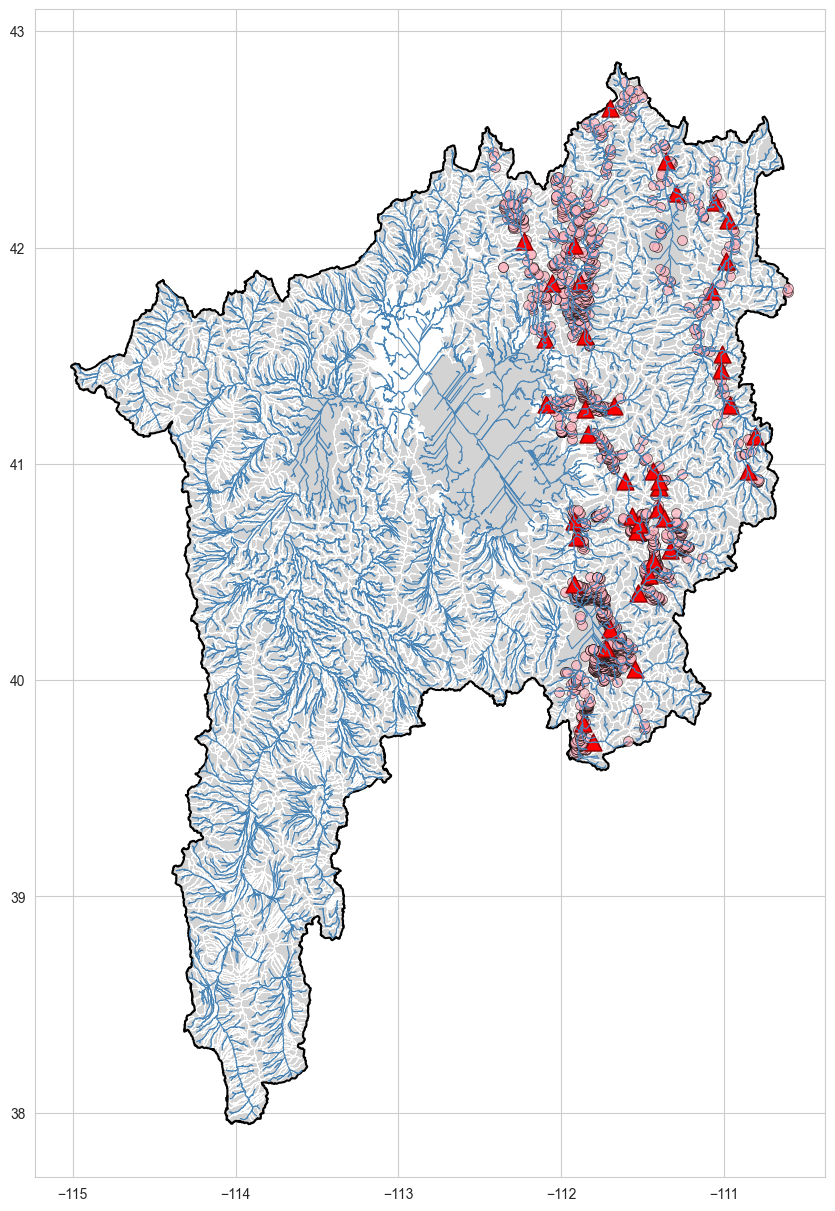

In [22]:
from shapely.geometry import Point
import geopandas as gpd

# Get unique well and gage locations with proper filtering
unique_well_locations = final_result_cleaned[['well_id', 'well_lon', 'well_lat']].drop_duplicates()
unique_well_locations = unique_well_locations.dropna()  # Remove any NaN values

unique_gage_locations = final_result_cleaned[['gage_id', 'gage_lon', 'gage_lat']].drop_duplicates()
unique_gage_locations = unique_gage_locations.dropna()  # Remove any NaN values

# Create GeoDataFrames with explicit CRS
well_gdf = gpd.GeoDataFrame(
    unique_well_locations,
    geometry=[Point(xy) for xy in zip(unique_well_locations['well_lon'], unique_well_locations['well_lat'])],
    crs="EPSG:4326"
)

# Merge gage locations with class information
gage_class['STAID'] = gage_class['STAID'].astype(str)
unique_gage_locations['gage_id'] = unique_gage_locations['gage_id'].astype(str)
unique_gage_locations = pd.merge(
    unique_gage_locations,
    gage_class[['STAID', 'CLASS']],
    left_on='gage_id',
    right_on='STAID',
    how='left'
)

gage_gdf = gpd.GeoDataFrame(
    unique_gage_locations,
    geometry=[Point(xy) for xy in zip(unique_gage_locations['gage_lon'], unique_gage_locations['gage_lat'])],
    crs="EPSG:4326"
)

# Ensure all GeoDataFrames have same CRS
subbasin_gdf = gpd.read_file('shp/clipped_703_catchments.shp').to_crs("EPSG:4326")
stream_gdf = gpd.read_file('shp/gsl_stream.shp').to_crs("EPSG:4326")
basin_gdf = gpd.read_file('shp/gsl_basin.shp').to_crs("EPSG:4326")

# Create plot
fig, ax = plt.subplots(figsize=(12, 12), constrained_layout=True)

# Plot layers with proper settings
subbasin_gdf.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)
stream_gdf.plot(ax=ax, color='steelblue', linewidth=0.8)
basin_gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)

well_gdf.plot(ax=ax, color='lightpink', edgecolor='black', marker='o',
              markersize=50, linewidth=0.5, label=f'Wells ({len(well_gdf)})', alpha=0.7)

# Plot gages by class
non_ref = gage_gdf[gage_gdf['CLASS'] == 'Non-ref']
ref = gage_gdf[gage_gdf['CLASS'] == 'Ref']

non_ref.plot(ax=ax, marker='^', color='red', edgecolor='darkred', markersize=150,
             label=f'Non-reference Gages ({len(non_ref)})')
ref.plot(ax=ax, marker='^', color='yellow', edgecolor='orange', markersize=150,
         label=f'Reference Gages ({len(ref)})')

# Set extent from basin bounds
bounds = basin_gdf.total_bounds
width = bounds[2] - bounds[0]
height = bounds[3] - bounds[1]
ax.set_xlim(bounds[0] - width * 0.05, bounds[2] + width * 0.05)
ax.set_ylim(bounds[1] - height * 0.05, bounds[3] + height * 0.05)

# Add legend and labels
plt.legend(title=f'Total Gages: {len(gage_gdf)}', frameon=True, facecolor='white', edgecolor='black')
plt.title('Wells and Gages Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()
